In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearregression import * # Import my implemtation of Linear Regression
sns.set_theme()

 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset." So the coefficients are [7, 2, -5] and the intercept is 3. Our model will attempt to find these four values.

In [2]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [3]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X[:5])
print(Y[:5])

[[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 24]
 [ 3 22 53]]
[[ 478]
 [ 524]
 [ 383]
 [ 584]
 [-197]]


In [4]:
X.shape

(1000, 3)

In [5]:
Y.shape

(1000, 1)

In [6]:
#Generate test data using our function
X_test = np.random.randint(1, 10, size=(50, 3))
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]

In [7]:
X_test.shape

(50, 3)

In [8]:
Y_true.shape

(50, 1)

In [9]:
W = np.random.randn(X.shape[1], 1) * np.sqrt(2/X.shape[1])
b = 0.0

In [10]:
print(W)

[[-0.51315574]
 [ 0.49192058]
 [-0.5789236 ]]


In [11]:
linear_regression = LinearRegression()

In [12]:
params, histories, predictions = linear_regression.fit(X, Y, W, b,X_test,Y_true,
    optimizer='adam',learning_rate=0.001, epochs=1, batch_size=1, num_iters=100000, bias=True)
W = params['W']
b = params['b']
J_histories = histories['J_histories']
W_histories = histories['W_histories']
b_histories = histories['b_histories']
iterations = histories['iterations']

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 11045355.83264394   
Iteration 10000: Cost 21007356.93399203   
Iteration 20000: Cost 21004524.68009415   
Iteration 30000: Cost 20588416.44969027   
Iteration 40000: Cost 10050946.90415854   
Iteration 50000: Cost 1375988.55920513   
Iteration 60000: Cost 3818.82976737   
Iteration 70000: Cost 0.06952205   
Iteration 80000: Cost 0.04187866   
Iteration 90000: Cost 0.04235841   
Iteration 99999: Cost 0.04238827   
Train RMSE: 9270.508725167385
Test RMSE: 169.79801384765514


Let us view the weights (coefficients) that our model predicted, we can see that it has nearly accurately computed the weights and
bias (intercept).

In [13]:
W

array([[ 7.0005263],
       [ 2.0005263],
       [-4.9994737]])

In [14]:
b

array([3.0005263])

In [15]:
predictions = linear_regression.predict(X_test, W, b)

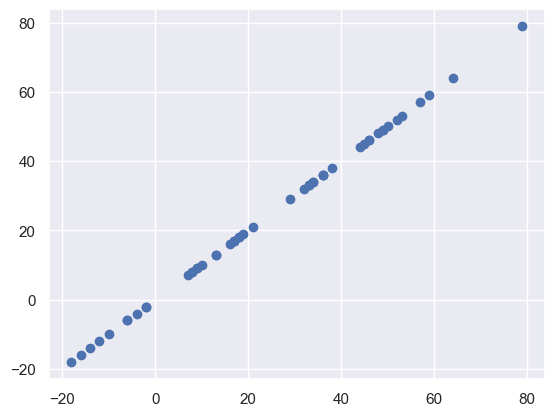

In [16]:
plt.scatter(Y_true, predictions);

In [17]:
W_histories = np.array(W_histories)
W_histories.shape

(1, 11, 3, 1)

In [18]:
J_histories = np.array(J_histories)
J_histories.shape

(1, 11)

In [19]:
b_histories = np.array(b_histories)
b_histories.shape

(1, 11, 1)

In [20]:
jh = J_histories.ravel()
jh

array([1.10453558e+07, 2.10073569e+07, 2.10045247e+07, 2.05884164e+07,
       1.00509469e+07, 1.37598856e+06, 3.81882977e+03, 6.95220530e-02,
       4.18786556e-02, 4.23584054e-02, 4.23882738e-02])

In [21]:
bh = np.ravel(b_histories)
bh

array([31.62277976, 43.02937769, 43.02692212, 42.66390366, 30.51699421,
       12.41623859,  1.67824426,  2.22922483,  2.99951435,  2.9994757 ,
        3.0005263 ])

In [22]:
iterations = np.array(iterations)
iterations

array([    0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,
       90000, 99999])

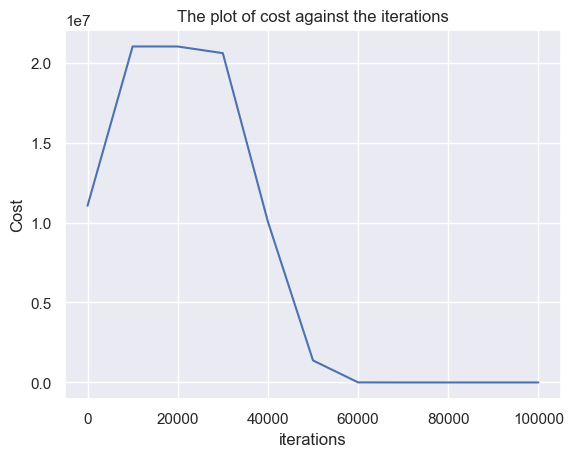

In [23]:
plt.plot(iterations, jh)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();